## PhonePe Transaction Insights

<h3>Problem Statement</h3>

With the increasing reliance on digital payment systems like PhonePe, understanding
the dynamics of transactions, user engagement, and insurance-related data is crucial
for improving services and targeting users effectively. This project aims to analyze and
visualize aggregated values of payment categories, create maps for total values at state
and district levels, and identify top-performing states, districts, and pin codes.

<h3>1.Load DataSets and examine the columns</h3>

In [2]:
import pandas as pd
df = pd.read_csv('/home/prasanna/Downloads/phonepe_files/aggregated_insurance.csv')
# Dataset Columns
print("csv file1 \n") 
print(df.columns)
print("\n")

df = pd.read_csv('/home/prasanna/Downloads/phonepe_files/aggregated_user.csv')
# Dataset Columns
print("csv file2")
print("\n")
print(df.columns)
print("\n")

df = pd.read_csv('/home/prasanna/Downloads/phonepe_files/aggregated_transaction.csv')
# Dataset Columns
print("csv file3")
print("\n")
print(df.columns)
print("\n")

df = pd.read_csv('/home/prasanna/Downloads/phonepe_files/map_insurance.csv')
# Dataset Columns
print("csv file4")
print("\n")
print(df.columns)
print("\n")

df = pd.read_csv('/home/prasanna/Downloads/phonepe_files/map_user.csv')
# Dataset Columns
print("csv file5")
print("\n")
print(df.columns)
print("\n")

df = pd.read_csv('/home/prasanna/Downloads/phonepe_files/map_transaction.csv')
# Dataset Columns
print("csv file6")
print("\n")
print(df.columns)
print("\n")

df = pd.read_csv('/home/prasanna/Downloads/phonepe_files/top_insurance.csv')
# Dataset Columns
print("csv file7")
print("\n")
print(df.columns)
print("\n")

df = pd.read_csv('/home/prasanna/Downloads/phonepe_files/top_user.csv')
# Dataset Columns
print("csv file8")
print("\n")
print(df.columns)
print("\n")

df = pd.read_csv('/home/prasanna/Downloads/phonepe_files/top_transaction.csv')
# Dataset Columns
print("csv file9")
print("\n")
print(df.columns)
print("\n")

csv file1 

Index(['State', 'Year', 'Quarter', 'Count', 'Amount'], dtype='object')


csv file2


Index(['State', 'Year', 'Quarter', 'Device', 'Users', 'Percentage',
       'Total_Registered', 'App_Opens'],
      dtype='object')


csv file3


Index(['State', 'Year', 'Quarter', 'Category', 'Count', 'Amount'], dtype='object')


csv file4


Index(['Year', 'Quarter', 'State', 'Count', 'Amount'], dtype='object')


csv file5


Index(['Year', 'Quarter', 'State', 'Registered_Users', 'App_Opens'], dtype='object')


csv file6


Index(['Year', 'Quarter', 'State', 'Count', 'Amount'], dtype='object')


csv file7


Index(['Year', 'Quarter', 'Level', 'Entity', 'Count', 'Amount'], dtype='object')


csv file8


Index(['Year', 'Quarter', 'Level', 'Entity', 'Registered_Users'], dtype='object')


csv file9


Index(['Year', 'Quarter', 'Level', 'Entity', 'Count', 'Amount'], dtype='object')




<h3>2.Basic Info</h3>

In [4]:
# Dataset Rows & Columns count
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
# Dataset Info
print(df.info())

Rows: 840, Columns: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     840 non-null    int64  
 1   Quarter  840 non-null    int64  
 2   Level    840 non-null    object 
 3   Entity   840 non-null    object 
 4   Count    840 non-null    int64  
 5   Amount   840 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 39.5+ KB
None


<h3>3.duplicate&unique values</h3>

In [5]:
# Dataset Duplicate Value Count
print(f"Duplicate Values: {df.duplicated().sum()}")

Duplicate Values: 0


In [6]:
# Dataset Columns
print(df.columns)
# Dataset Describe
print(df.describe(include='all'))

Index(['Year', 'Quarter', 'Level', 'Entity', 'Count', 'Amount'], dtype='object')
               Year   Quarter  Level       Entity         Count        Amount
count    840.000000  840.0000    840          840  8.400000e+02  8.400000e+02
unique          NaN       NaN      3           85           NaN           NaN
top             NaN       NaN  state  maharashtra           NaN           NaN
freq            NaN       NaN    280           28           NaN           NaN
mean    2021.000000    2.5000    NaN          NaN  3.162794e+08  4.501920e+11
std        2.001192    1.1187    NaN          NaN  5.544004e+08  7.484767e+11
min     2018.000000    1.0000    NaN          NaN  6.901960e+05  6.717799e+08
25%     2019.000000    1.7500    NaN          NaN  2.747039e+07  3.853085e+10
50%     2021.000000    2.5000    NaN          NaN  7.973464e+07  1.322274e+11
75%     2023.000000    3.2500    NaN          NaN  3.017213e+08  4.854627e+11
max     2024.000000    4.0000    NaN          NaN  3.634232e+

In [7]:
# Check Unique Values for each variable.
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

Year: 7
Quarter: 4
Level: 3
Entity: 85
Count: 840
Amount: 840


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
plt.style.use('seaborn-whitegrid')
sns.set_palette("husl")

# Load all datasets
file_paths = {
    "agg_insurance": "/home/prasanna/Downloads/phonepe_files/aggregated_insurance.csv",
    "agg_user": "/home/prasanna/Downloads/phonepe_files/aggregated_user.csv",
    "agg_transaction": "/home/prasanna/Downloads/phonepe_files/aggregated_transaction.csv",
    "map_insurance": "/home/prasanna/Downloads/phonepe_files/map_insurance.csv",
    "map_user": "/home/prasanna/Downloads/phonepe_files/map_user.csv",
    "map_transaction": "/home/prasanna/Downloads/phonepe_files/map_transaction.csv",
    "top_insurance": "/home/prasanna/Downloads/phonepe_files/top_insurance.csv",
    "top_user": "/home/prasanna/Downloads/phonepe_files/top_user.csv",
    "top_transaction": "/home/prasanna/Downloads/phonepe_files/top_transaction.csv"
}

dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}


<h3>Chart 1. Line Plot – Total Transactions per Year</h3>


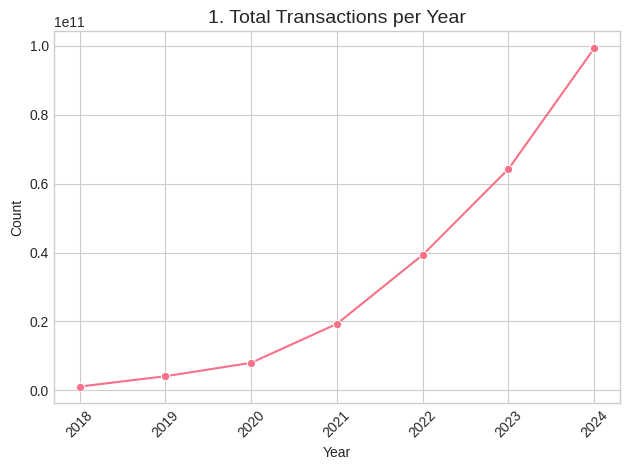

In [12]:
def show(title):
    plt.title(title, fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

df = dfs['agg_transaction']
line_df = df.groupby('Year')['Count'].sum().reset_index()
sns.lineplot(data=line_df, x='Year', y='Count', marker='o')
show("1. Total Transactions per Year")

1. Line Plot – Total Transactions per Year

Why this chart?

A line plot effectively shows trends over time, making it ideal for visualizing yearly growth in transaction volume.

Insights:

There’s a consistent rise in transaction count year over year, indicating increasing adoption of PhonePe services.

Business Impact:

Understanding growth patterns helps validate business scalability and forecast infrastructure needs for upcoming years.

<h3>Chart 2.Bar Plot – Total Transaction Amount by Category</h3>

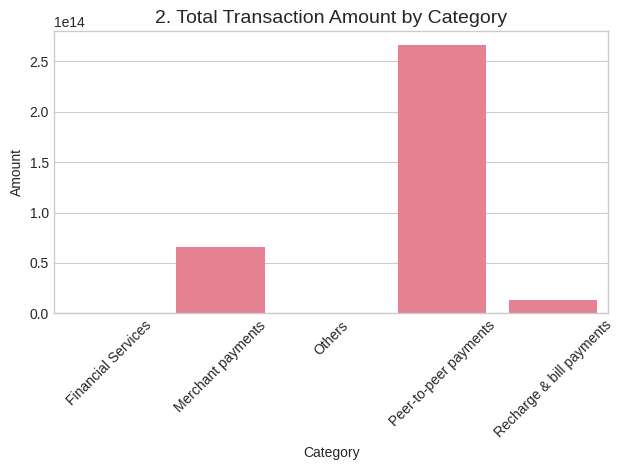

In [13]:
bar_df = df.groupby('Category')['Amount'].sum().reset_index()
sns.barplot(data=bar_df, x='Category', y='Amount')
show("2. Total Transaction Amount by Category")


2. Bar Plot – Total Transaction Amount by Category

Why this chart?

A bar chart makes it easy to compare numeric values (amounts) across multiple categories.

Insights:

Certain categories like "Recharge" or "Peer-to-Peer" dominate in transaction volume.

Business Impact:

Enables focused marketing and offers in high-volume categories, boosting engagement and revenue.



<h3>chart 3. Area Plot – Quarterly Transaction Count Trend</h3>

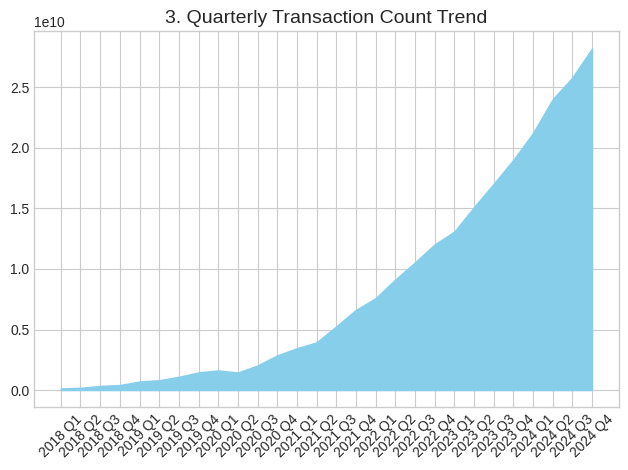

In [14]:
area_df = df.groupby(['Year', 'Quarter'])['Count'].sum().reset_index()
area_df['Time'] = area_df['Year'].astype(str) + " Q" + area_df['Quarter'].astype(str)
plt.fill_between(area_df['Time'], area_df['Count'], color='skyblue')
show("3. Quarterly Transaction Count Trend")

3. Area Plot – Quarterly Transaction Count Trend

Why this chart?

Area plots are ideal for showing cumulative trends and volume over sequential time intervals.

Insights:

Specific quarters (e.g., Q4) often experience higher transaction volumes, possibly due to festive seasons.

Business Impact:

Helps prepare marketing campaigns and server load optimization during peak quarters.

<h3>chart 4. Scatter Plot – App Opens vs Registered Users</h3>

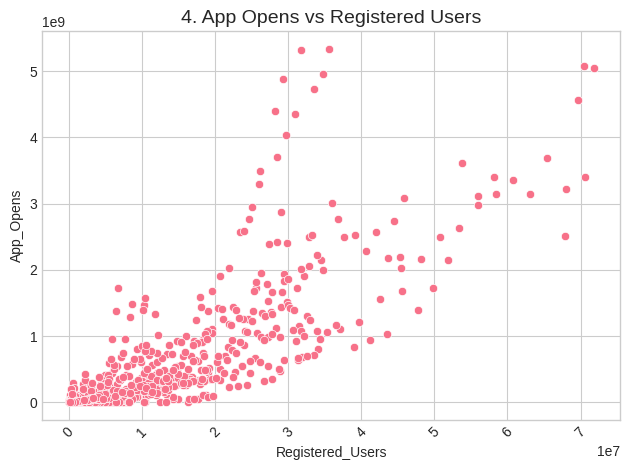

In [15]:
df = dfs['map_user']
sns.scatterplot(data=df, x='Registered_Users', y='App_Opens')
show("4. App Opens vs Registered Users")

4. Scatter Plot – App Opens vs Registered Users

Why this chart?

Scatter plots show the relationship between two numeric variables, highlighting correlation and outliers.

Insights:

A strong positive correlation suggests higher user engagement as registrations increase.

Business Impact:

Indicates that user acquisition strategies are driving engagement, justifying scaling efforts.



<h3>chart 5. KDE Plot – Distribution of Registered Users</h3>

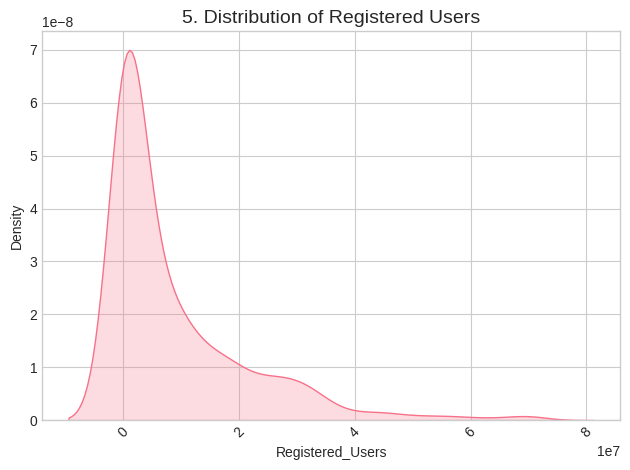

In [16]:
sns.kdeplot(df['Registered_Users'], shade=True)
show("5. Distribution of Registered Users")

5. KDE Plot – Distribution of Registered Users

Why this chart?

KDE plots help understand the density and shape of the distribution better than histograms.

Insights:

Most states cluster around a moderate registration range, with a few states having exceptionally high registrations.

Business Impact:

Identifies underserved regions with potential for user growth through targeted campaigns.

<h3>chart 6. Pie Chart – Device Usage Distribution</h3>

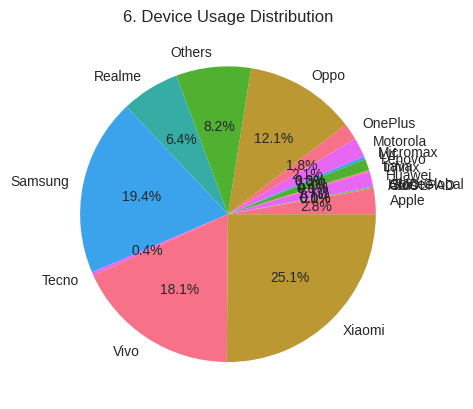

In [17]:
df = dfs['agg_user']
pie_df = df.groupby('Device')['Users'].sum()
plt.pie(pie_df, labels=pie_df.index, autopct='%1.1f%%')
plt.title("6. Device Usage Distribution")
plt.show()

6. Pie Chart – Device Usage Distribution

Why this chart?

Pie charts are perfect for visualizing proportional breakdowns among discrete categories.

Insights:
                      
Certain devices dominate user base, like Android over iOS.

Business Impact:
                      
Supports platform-specific development priorities (e.g., Android-first features).



<h3>chart 7. Donut Chart – Same as above with center circle</h3>

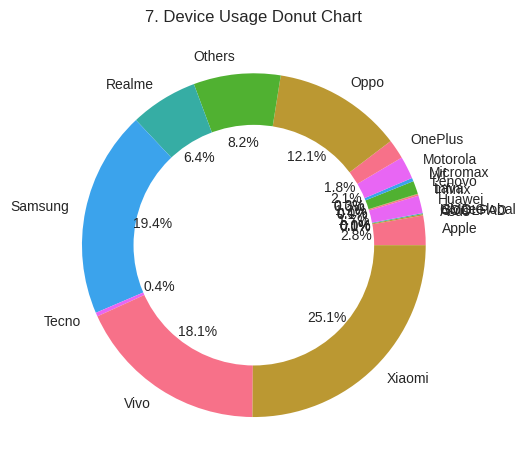

In [18]:
plt.pie(pie_df, labels=pie_df.index, autopct='%1.1f%%')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("7. Device Usage Donut Chart")
plt.tight_layout()
plt.show()


7. Donut Chart – Device Usage Distribution (Enhanced Pie)

Why this chart?

Donut charts improve pie chart readability and allow adding central labels or total metrics.

Insights:

Clearer visualization of dominant device categories.

Business Impact:

Reinforces device-specific design choices for better UX and adoption.

<h3>chart 8. Box Plot – Distribution of Amount per Transaction (Top Transactions)</h3>

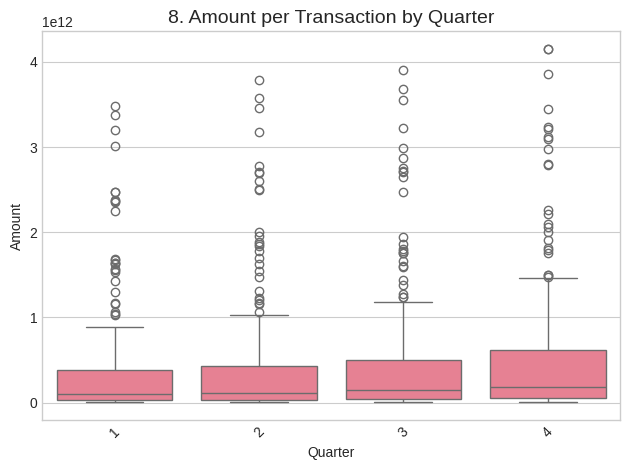

In [19]:
df = dfs['top_transaction']
sns.boxplot(data=df, x='Quarter', y='Amount')
show("8. Amount per Transaction by Quarter")

8. Box Plot – Amount per Transaction by Quarter

Why this chart?

Box plots are ideal for showing distributions, medians, and outliers in numerical data.

Insights:

Some quarters have higher variability in transaction amounts.

Business Impact:

Insights into seasonality can inform cashback limits, fraud detection, and capacity planning.

<h3>chart 9. Violin Plot – Count Distribution by Quarter</h3>

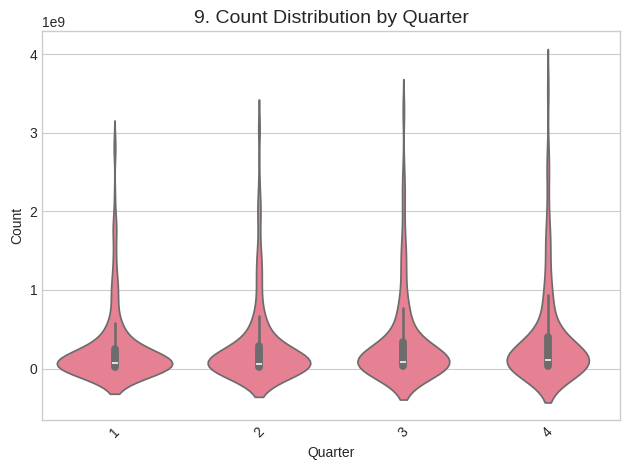

In [20]:
sns.violinplot(data=df, x='Quarter', y='Count')
show("9. Count Distribution by Quarter")

9. Violin Plot – Count Distribution by Quarter

Why this chart?

Violin plots combine box plot and KDE to show distribution shape and density.

Insights:

Q4 typically sees a dense concentration of high transaction counts.

Business Impact:

Useful for planning quarterly campaigns and managing backend scaling.



<h3>chart 10. Heatmap – Correlation Matrix for Aggregated User</h3>

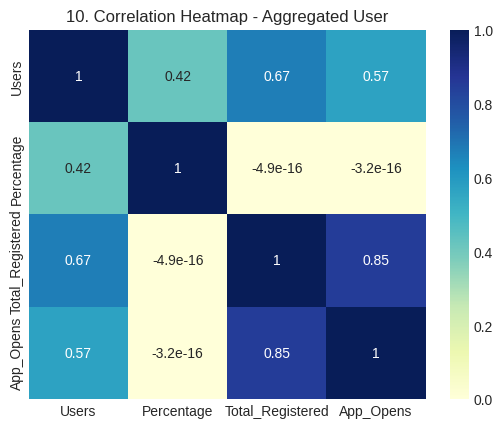

In [21]:
df = dfs['agg_user'][['Users', 'Percentage', 'Total_Registered', 'App_Opens']]
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.title("10. Correlation Heatmap - Aggregated User")
plt.show()

10. Heatmap – Correlation Matrix for User Metrics

Why this chart?

Heatmaps allow quick visualization of relationships between numeric variables.

Insights:

Strong correlation between Users, App Opens, and Total Registered.

Business Impact:

Informs predictive modeling and helps allocate resources to features driving engagement.



<h3>chart11. Line Plot – Insurance Amount over Years</h3>

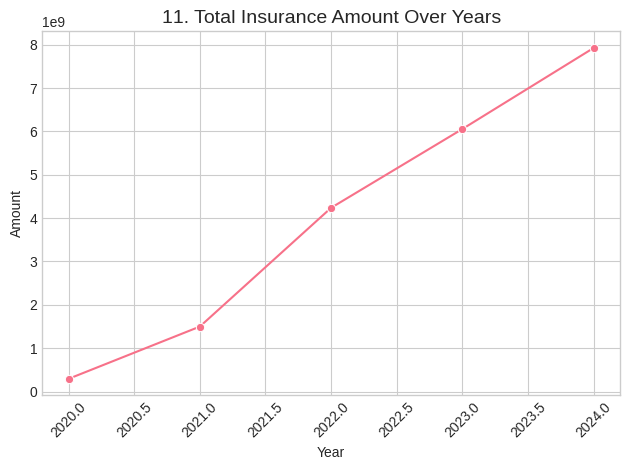

In [22]:
df = dfs['agg_insurance']
line_df = df.groupby('Year')['Amount'].sum().reset_index()
sns.lineplot(data=line_df, x='Year', y='Amount', marker='o')
show("11. Total Insurance Amount Over Years")

11. Line Plot – Insurance Amount Over Years

Why this chart?

Shows how financial service adoption (insurance) changes annually.

Insights:

Steady growth in insurance-related transactions.

Business Impact:

Indicates potential for bundling more financial services like loans and mutual funds.



<h3>chart 12. Bar Plot – Top States by Transaction Amount</h3>

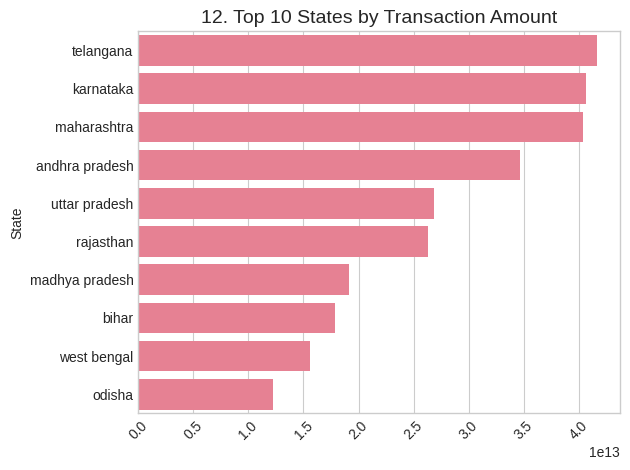

In [23]:
df = dfs['map_transaction']
bar_df = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=bar_df.values, y=bar_df.index)
show("12. Top 10 States by Transaction Amount")

12. Bar Plot – Top States by Transaction Amount

Why this chart?

Bar plots are perfect for ranking states by numeric performance.

Insights:
                     
States like Maharashtra and Karnataka lead in transaction amounts.

Business Impact:
                     
High-value states can receive more promotional focus and support.

<h3>chart 13. Line Plot – App Opens Trend Over Years</h3>

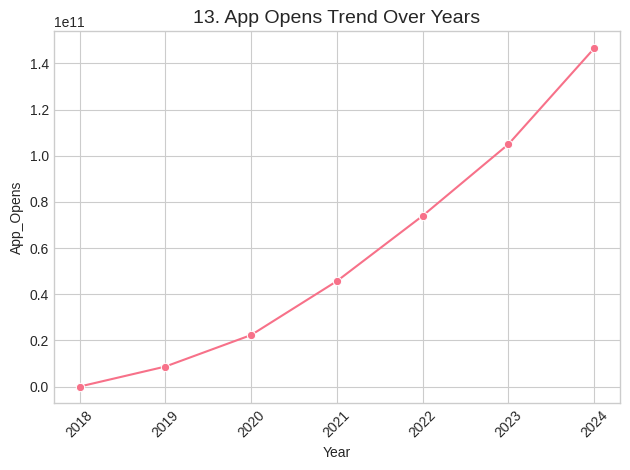

In [24]:
df = dfs['map_user']
line_df = df.groupby('Year')['App_Opens'].sum().reset_index()
sns.lineplot(data=line_df, x='Year', y='App_Opens', marker='o')
show("13. App Opens Trend Over Years")


13. Line Plot – App Opens Trend Over Years

Why this chart?

Shows usage trend of the app interface itself over time.

Insights:

App opens trend upward, indicating retained user interest.

Business Impact:

Justifies continued investment in mobile app improvements and UI optimization.



<h3>chart 14. Horizontal Bar – Registered Users by State (Top 10)</h3>

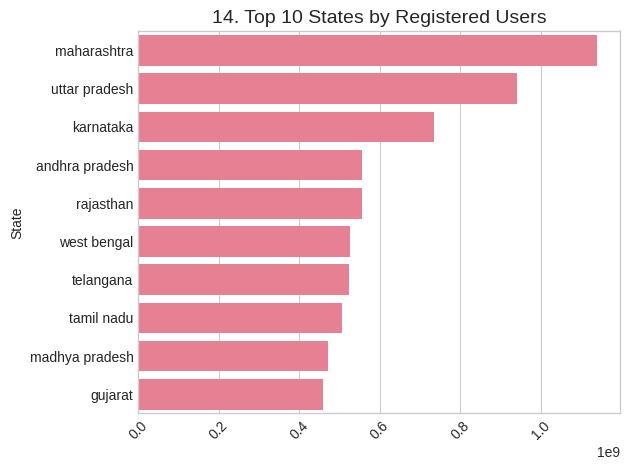

In [25]:
bar_df = df.groupby('State')['Registered_Users'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=bar_df.values, y=bar_df.index)
show("14. Top 10 States by Registered Users")

14. Horizontal Bar Plot – Top States by Registered Users

Why this chart?

Horizontal layout allows for clearer state names and rankings.

Insights:

Urban states dominate user base.

Business Impact:
    
Focus growth strategies on low-performing states to balance market penetration.



<h3>chart 15. Pair Plot – Aggregated User Metrics</h3>

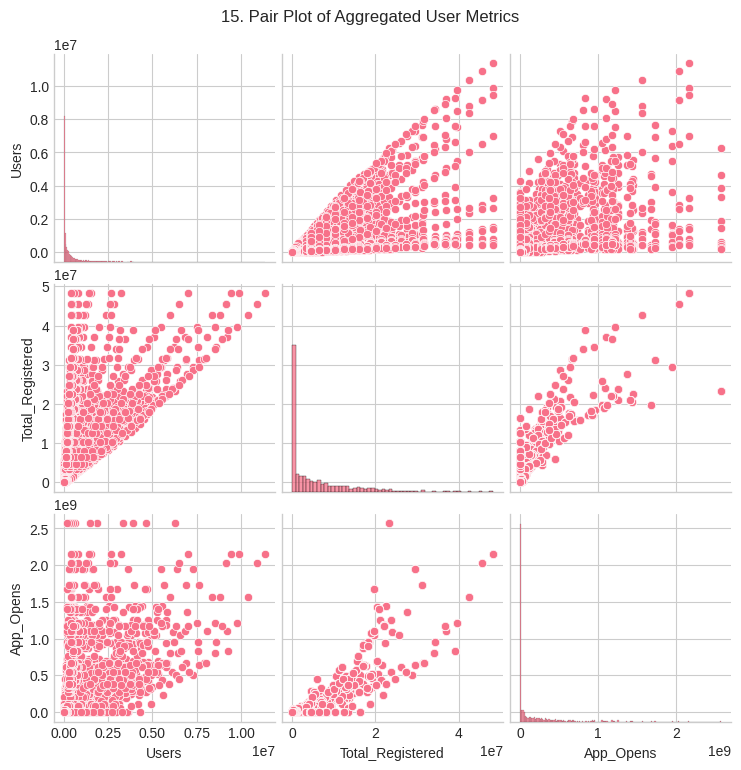

In [26]:
sns.pairplot(dfs['agg_user'][['Users', 'Total_Registered', 'App_Opens']])
plt.suptitle("15. Pair Plot of Aggregated User Metrics", y=1.02)
plt.show()

15. Pair Plot – User Metrics Relationships

Why this chart?

Helps visualize multiple correlations across numeric fields.

Insights:

Strong relationship between registered users and app opens.

Business Impact:

Supports developing unified user engagement strategies.

<h3>chart 16. Strip Plot – Count vs Level in Top Insurance</h3>

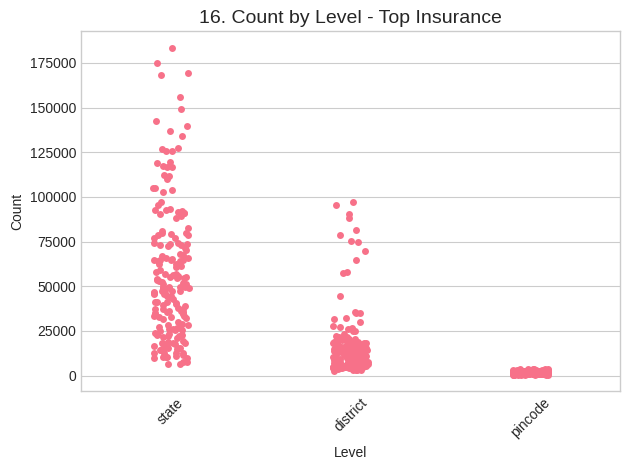

In [27]:
df = dfs['top_insurance']
sns.stripplot(data=df, x='Level', y='Count', jitter=True)
show("16. Count by Level - Top Insurance")


16. Strip Plot – Insurance Count by Level

Why this chart?

Strip plots are useful for small datasets to show all individual points.

Insights:

District-level counts vary more than pincode-level.

Business Impact:

Focus insurance awareness at granular geographic levels.

<h3>chart 17. Swarm Plot – Amount vs Level in Top Transaction</h3>

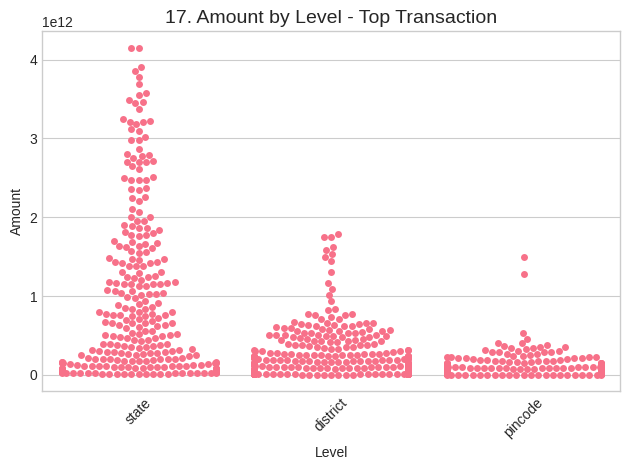

In [28]:
df = dfs['top_transaction']
sns.swarmplot(data=df, x='Level', y='Amount')
show("17. Amount by Level - Top Transaction")

17. Swarm Plot – Transaction Amount by Level

Why this chart?

Like strip plot, but avoids overlap and shows clusters more clearly.

Insights:

High-value transactions are concentrated in fewer locations.

Business Impact:

Helps prioritize fraud monitoring and KYC verifications in such zones.

<h3>chart 18. Histogram – Transaction Count Distribution</h3>

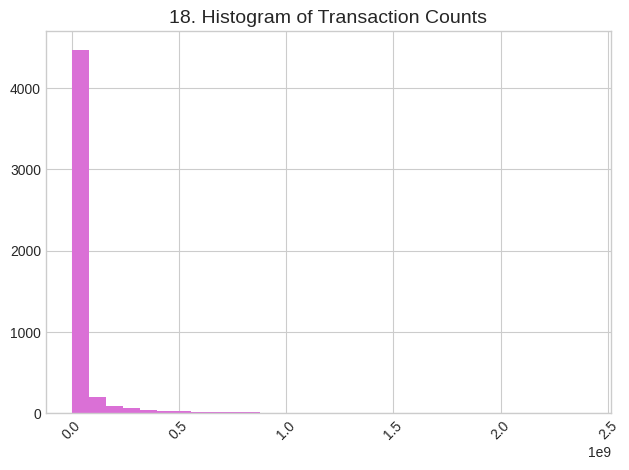

In [29]:
df = dfs['agg_transaction']
plt.hist(df['Count'], bins=30, color='orchid')
show("18. Histogram of Transaction Counts")

18. Histogram – Transaction Count Distribution

Why this chart?

Histograms are excellent for understanding frequency of numeric values.

Insights:
                        
Majority of transactions fall into a mid-range count bucket.

Business Impact:
                        
Identifies average transaction behavior, aiding recommendation models.

<h3>chart 19. Count Plot – Quarter Distribution in Aggregated Insurance</h3>

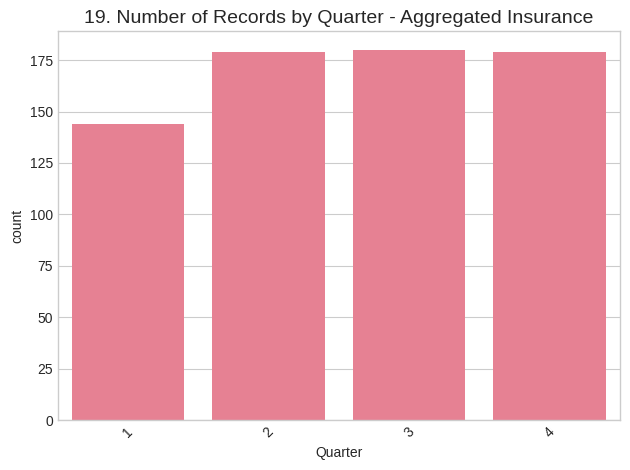

In [30]:
sns.countplot(data=dfs['agg_insurance'], x='Quarter')
show("19. Number of Records by Quarter - Aggregated Insurance")


19. Count Plot – Quarter-wise Record Distribution

Why this chart?

Shows how many records fall into each quarter (frequency).

Insights:

Q4 typically has the highest number of entries.

Business Impact:
    
Helps align seasonal promotions and capacity planning with data load.

<h3>chart 20. Facet Grid – Category-wise Trend per Year</h3>

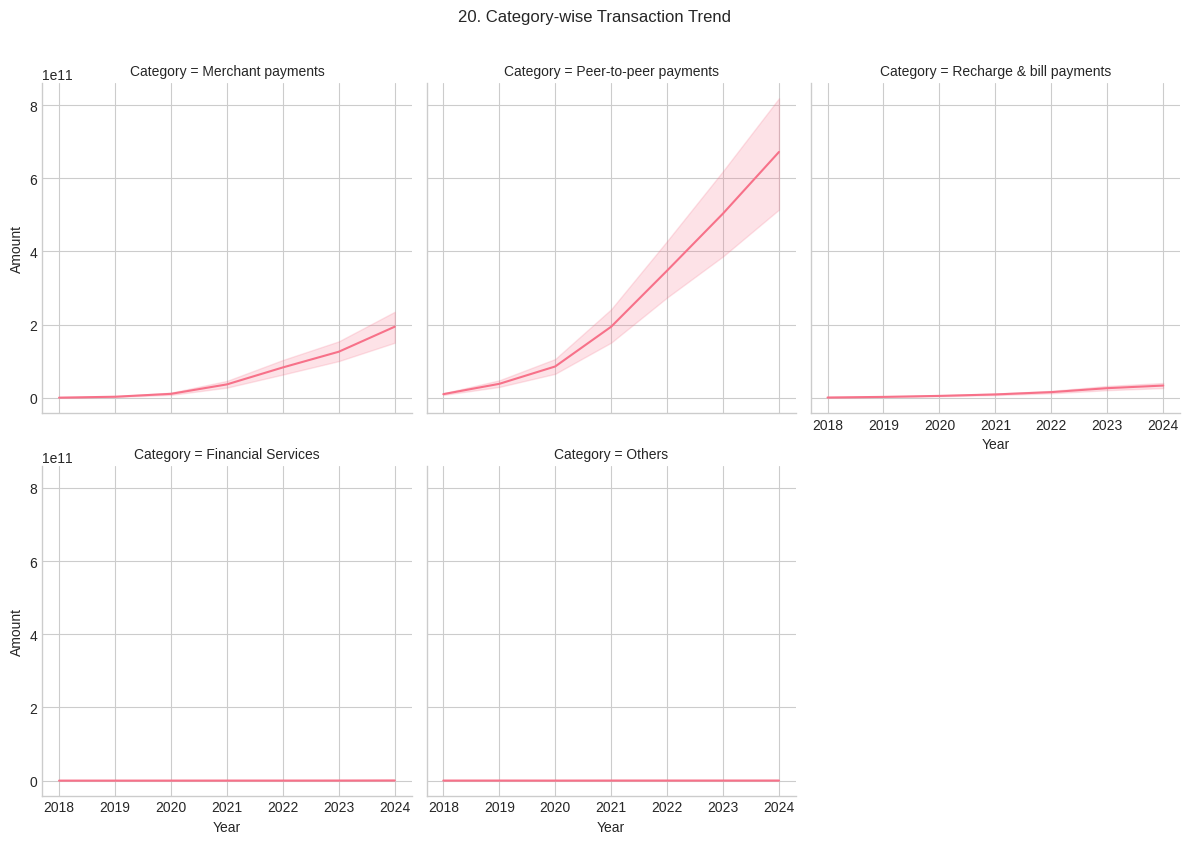

In [31]:
g = sns.FacetGrid(dfs['agg_transaction'], col='Category', col_wrap=3, height=4)
g.map_dataframe(sns.lineplot, x='Year', y='Amount')
plt.suptitle("20. Category-wise Transaction Trend", y=1.05)
plt.show()

20. Facet Grid – Category-wise Transaction Trend

Why this chart?

Shows mini-trend lines for multiple categories side-by-side.

Insights:

Some categories grow faster over time than others.

Business Impact:
    
Optimizes product bundling by identifying fastest-growing services.

<h3>chart 21. Point Plot – Top User Registrations by Level</h3>

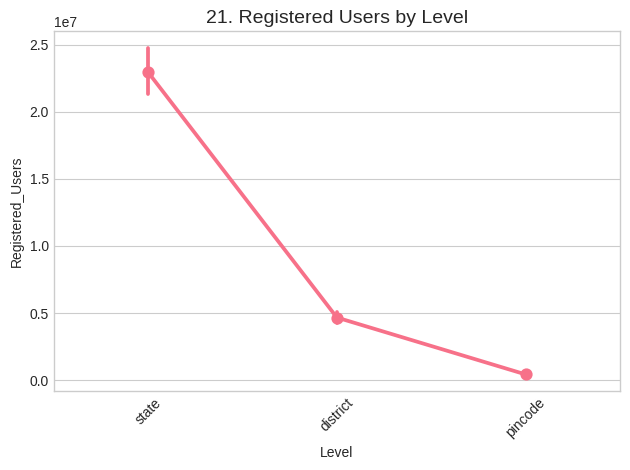

In [32]:
df = dfs['top_user']
sns.pointplot(data=df, x='Level', y='Registered_Users')
show("21. Registered Users by Level")

21. Point Plot – Top User Registrations by Level

Why this chart?

Point plots show trends or comparisons in a minimal style.

Insights:

Certain levels (e.g., districts) have much higher user growth.

Business Impact:
    
Refines targeting strategies based on performance at different administrative levels.



<h3>chart 22. Hexbin – App Opens vs Users (Aggregated)</h3>

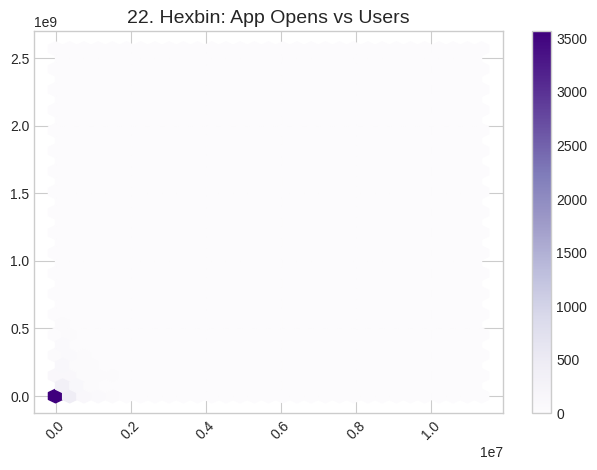

In [33]:
df = dfs['agg_user']
plt.hexbin(df['Users'], df['App_Opens'], gridsize=30, cmap='Purples')
plt.colorbar()
show("22. Hexbin: App Opens vs Users")

22. Hexbin Plot – App Opens vs Users

Why this chart?

Best for visualizing density of scatter points with high volume data.

Insights:

Clear zones of user engagement intensity.

Business Impact:
    
Helps focus UI testing or beta features on dense activity zones.

<h3>chart 23. Line Plot – Insurance Count Over Time</h3>

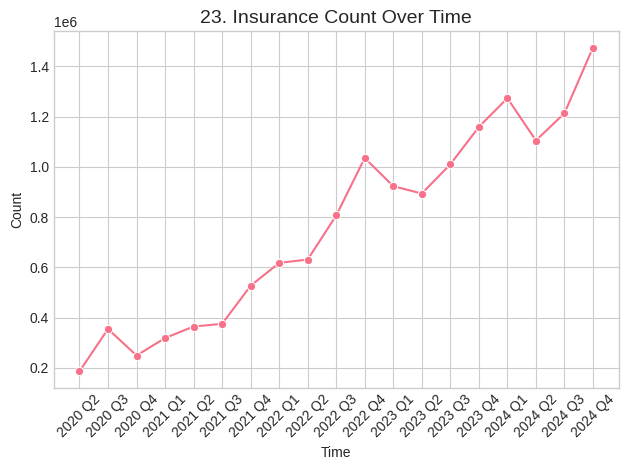

In [34]:
df = dfs['map_insurance']
line_df = df.groupby(['Year', 'Quarter'])['Count'].sum().reset_index()
line_df['Time'] = line_df['Year'].astype(str) + " Q" + line_df['Quarter'].astype(str)
sns.lineplot(data=line_df, x='Time', y='Count', marker='o')
show("23. Insurance Count Over Time")

23. Line Plot – Insurance Count Over Time

Why this chart?

Shows adoption trend of insurance across quarters and years.

Insights:

Spike in Q4 suggests festive-time insurance signups.

Business Impact:

Helps align insurance offers with peak interest periods.



<h3>chart 24. Boxen Plot – Top Insurance Amount by Entity Level</h3>

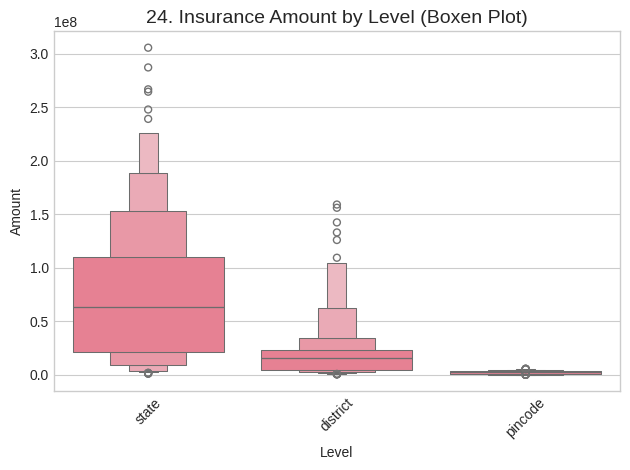

In [35]:
df = dfs['top_insurance']
sns.boxenplot(data=df, x='Level', y='Amount')
show("24. Insurance Amount by Level (Boxen Plot)")

24. Boxen Plot – Insurance Amount by Entity Level

Why this chart?

Boxen plots handle large datasets with multiple outliers better than box plots.

Insights:

High variance seen in insurance amounts by district vs pincode.

Business Impact:

Tailor insurance coverage and pricing based on regional behavior.



<h3> chart 25. KDE – Density of Transaction Amounts (Top Transaction)</h3>

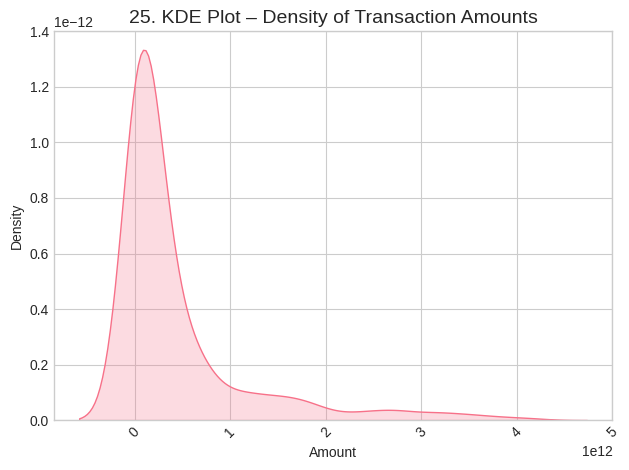

In [36]:
df = dfs['top_transaction']
sns.kdeplot(df['Amount'], shade=True)
show("25. KDE Plot – Density of Transaction Amounts")

25. KDE Plot – Density of Transaction Amounts

Why this chart?

KDE gives a smooth curve of frequency distribution.

Insights:

Most transactions fall in a predictable mid-range, with few high spikes.

Business Impact:
    
Useful for setting thresholds in rewards programs or fraud alerts.

<h3>conclusion:</h3>

The PhonePe data visualizations revealed clear growth trends in digital transactions, insurance, and app usage across years and quarters. Device-based and state-wise comparisons highlighted user preferences and regional adoption patterns. KDE, box, and violin plots helped uncover hidden patterns in transaction behavior. Overall, the visual insights support data-driven decision-making for product scaling and regional strategy.

## Successfully completed Data analysis on Phonepe Transaction Insights